# Single Machine Infinite Bus

The model of Single-machine Infinite Bus in the conference version is given as follow:
\begin{align}
    \frac{d\delta}{dt} &= \omega - \omega_{s} \\
    \frac{2H}{\omega_{s}} \frac{d\omega}{dt} &= P_{M} - \frac{E'_{q}V}{X_{d\Sigma}}\sin(\delta) - \frac{D(\omega-\omega_{s})}{\omega_{s}},
\end{align}
where the variables and parameters are described in the code below.
We consider SMIB with two cases: i) small diisturbance when changing $\delta$ by 0.02 from the equilibrium; ii) large disturbance when charging $\delta$ by 0.4 from the equilibrium.

In [1]:
#Import packages.
using QuDiffEq               # package containt quantum computing' solvers.
using OrdinaryDiffEq         # package containt solvers to solve ODEs.
using DifferentialEquations  # package containt solvers to solve differential equations.
using Plots                  # package to plot the figure.
using LaTeXStrings           # oackage to type LaTex in the Julia

#Define the ODEs for Single Machine Infinite Bus system with u[1] is the phase angle,
#and u[2] is the speed of synchronous machine.
function f(du,u,p,t)
    du[1] = u[2]-omega_R
    du[2] = (Pm - E*V*sin(u[1])/X - D*(u[2]-omega_R)/omega_R)*(omega_R/(2*H))
    end

#Paeameters for single machine infinite bus
omega_R = 120*pi # Reference speed.
Pm = 1           # mechanical power input.
E = 1.0566       # machine's voltage magnitude
V = 1            # voltage of infinite bus
X = 0.8805       # total reactance by d-axis.
D = 1.2          # damping constant 
H = 15;          # initial constant

## Small disturbance

#### Define the ODE system

In [2]:
u0 = [0.9851+0.02,omega_R] # initial condition for ODEs with small disturbance
h = 0.01                   # time steps
k = 2                      # the k_th order of Taylor expansion
tspan = (0.0,10.0)         # the time interval observing the model.
prob = ODEProblem(f,u0,tspan); # define the model for ODEs system.

#### Solving system

In [3]:
# Quantum ODE.
qsol_small = solve(prob,QuLDE(k),dt = h,adaptive=false) # solving ODEs system by quantum computing.
qsol_small = transpose(qsol_small)                      # to make it easier to save and plot a figure we use transpose function.

# Classical ODE
sol_small = solve(prob,Tsit5(),dt = h,adaptive = false) # solving ODEs system by classical method.
sol_small = transpose(sol_small);

#### Save the results.

In [4]:
#Saving the results by DataFrames and CSV
using DataFrames
using CSV

# define DataFrame from the above results.
df = DataFrame(delta_quan = qsol_small[1,:],omega_quan = qsol_small[2,:],delta_ODE = sol_small[:,1],omega_ODE=sol_small[:,2])

# saving DataFrame as a CSV file.
CSV.write("SMIB_small.csv", df; append = false);    

#### Plot the results.

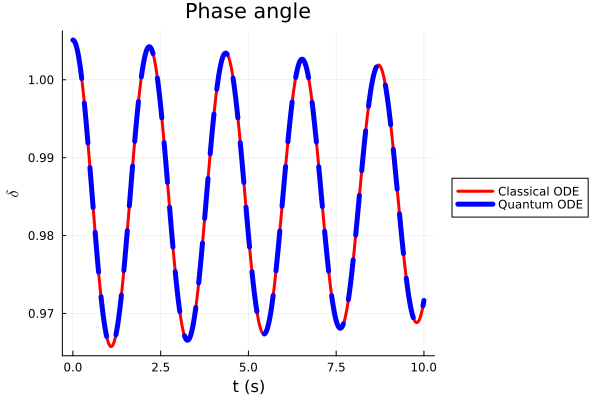

In [5]:
# Create a time array from tspan[1] to tspan[2] with a step of 0.1
time_array = tspan[1]:0.01:tspan[2]

# Plot the data with the legend outside
p = plot(time_array, sol_small[:,1], title = "Phase angle", label = "Classical ODE", lc = :red, ls = :solid, lw = 3, legend=:outerright)
plot!(time_array, qsol_small[1,:], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)

# Set labels
xlabel!("t (s)")
ylabel!(L"\delta")

# Display the plot
p

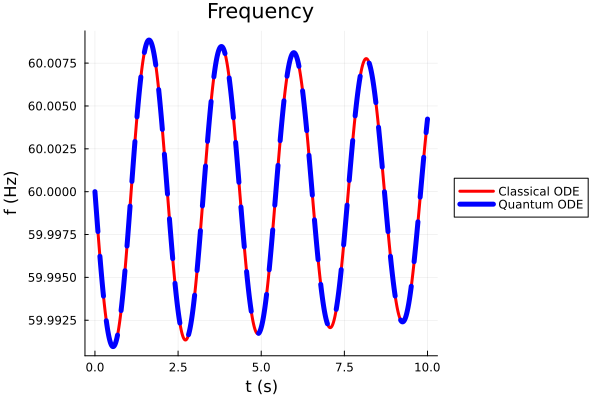

In [6]:
p = plot(time_array, sol_small[:,2]/(2*pi), title = "Frequency", label = "Classical ODE",lc = :red, ls = :solid, lw = 3, legend=:outerright)
plot!(time_array, qsol_small[2,:]/(2*pi), label = "Quantum ODE",lc = :blue, ls = :dash, lw = 5)

# Set labels
xlabel!("t (s)")
ylabel!("f (Hz)")

# Display the plot
p

## Large disturbance

#### Modified the initial confition for large disturbance

In [7]:
u0 = [0.9851+0.4,omega_R,0.0,0.0]  # change initial condition for ODEs.
prob = ODEProblem(f,u0,tspan);     # define the model for ODEs system with new condition.

#### Solving system

In [8]:
# Quantum ODE
qsol_large = solve(prob,QuLDE(k),dt = h,adaptive=false) 
qsol_large = transpose(qsol_large)

# Claisscal ODE
sol_large = solve(prob,Tsit5(),dt = h,adaptive = false) 
sol_large = transpose(sol_large);

#### Save the results.

In [9]:
#Saving the results
using DataFrames
using CSV
df = DataFrame(delta_quan = qsol_large[1,:], omega_quan = qsol_large[2,:], delta_ODE = sol_large[:,1], omega_ODE=sol_large[:,2])
CSV.write("SMIB_large.csv", df; append = false);

#### Plot the results.

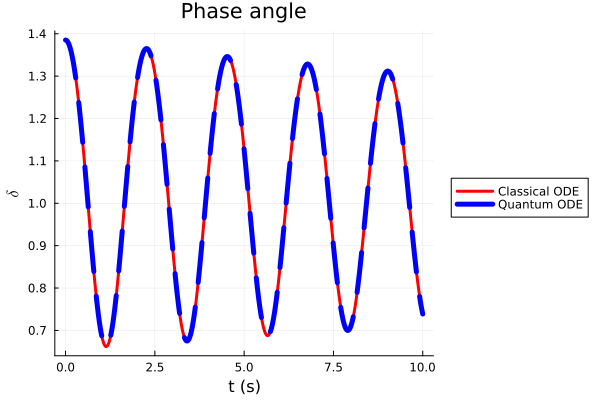

In [10]:
p = plot(time_array, sol_large[:,1], title = "Phase angle", label = "Classical ODE", lc = :red, ls = :solid, lw = 3) # Plot the figure of phase angle of classical method.
plot!(time_array, qsol_large[1,:], label = "Quantum ODE", lc = :blue, ls = :dash, lw = 5)                        # plot the second line of quantum computing in the same figure.
xlabel!("t (s)")
ylabel!(L"\delta")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()

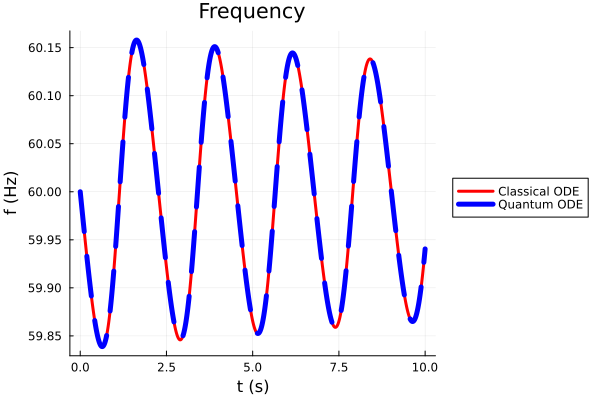

In [11]:
p = plot(time_array, sol_large[:,2]/(2*pi), title = "Frequency", label = "Classical ODE",lc = :red, ls = :solid, lw = 3)
plot!(time_array, qsol_large[2,:]/(2*pi), label = "Quantum ODE",lc = :blue, ls = :dash, lw = 5)
xlabel!("t (s)")
ylabel!("f (Hz)")

# Set the legend outside the plot
plot!(p, legend=:outerright)

# Display the plot
plot!()